# `compute_gaps_per_sat` Example

Testing the `compute_gaps_per_sat` function in `loc-gsopt/src/common/utils.py`

## Setup Imports

(not relevant to repo, can skip) 

Adding module path to run correctly in examples folder

In [3]:
import sys
import os

# Add the path to the folder containing the module
module_path = os.path.abspath(os.path.join('../..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/loc-gsopt/src


## Imports & Downloading latest Earth Orientation Data

In [4]:
# from common.sat_gen import make_tle
# from common.station_gen import gs_json
from common.utils import compute_gaps_per_sat, load_earth_data
from common.sat_gen import satellites_from_constellation
from common.station_gen import return_bdm_gs


# Brahe Imports
import brahe as bh
import brahe.data_models as bdm
import brahe.access.access as ba
import multiprocessing as mp



%matplotlib inline
import matplotlib.pyplot as plt

# Setup info
load_earth_data('data/iau2000A_finals_ab.txt')

Loading the latest Earth Orientation Data


## Scenario Development

In [10]:
##### Trying to generate a satellite just through tles ######

# Create a TLE
epc_start = bh.Epoch(2024, 5, 20, 0, 0, 0) # This is the epoch of the orbital elements
epc_end = bh.Epoch(2024, 5, 21, 0, 0, 0)
satellites = satellites_from_constellation("ICEYE")[0:10]

ground_stations = []

gs_list = [[-115.49138014655307, -88.84287057301663], [-32.48943805502638, 83.6455731013123], [146.3934385151615, -39.15096467523516]]
#[[27.93191677601733, -90.0], [149.5319919768149, -34.95112833568945], [-62.12542155752943, -69.20261479053809]]
#[[92.44410570135645, -90.0], [-68.17384533868844, -89.98132260158941], [-51.260167274781224, -89.9645197301773]]
for gs in gs_list:
    ground_stations.append(return_bdm_gs(gs[0], gs[1]))

plot = True
title="gap_times_chart.png"


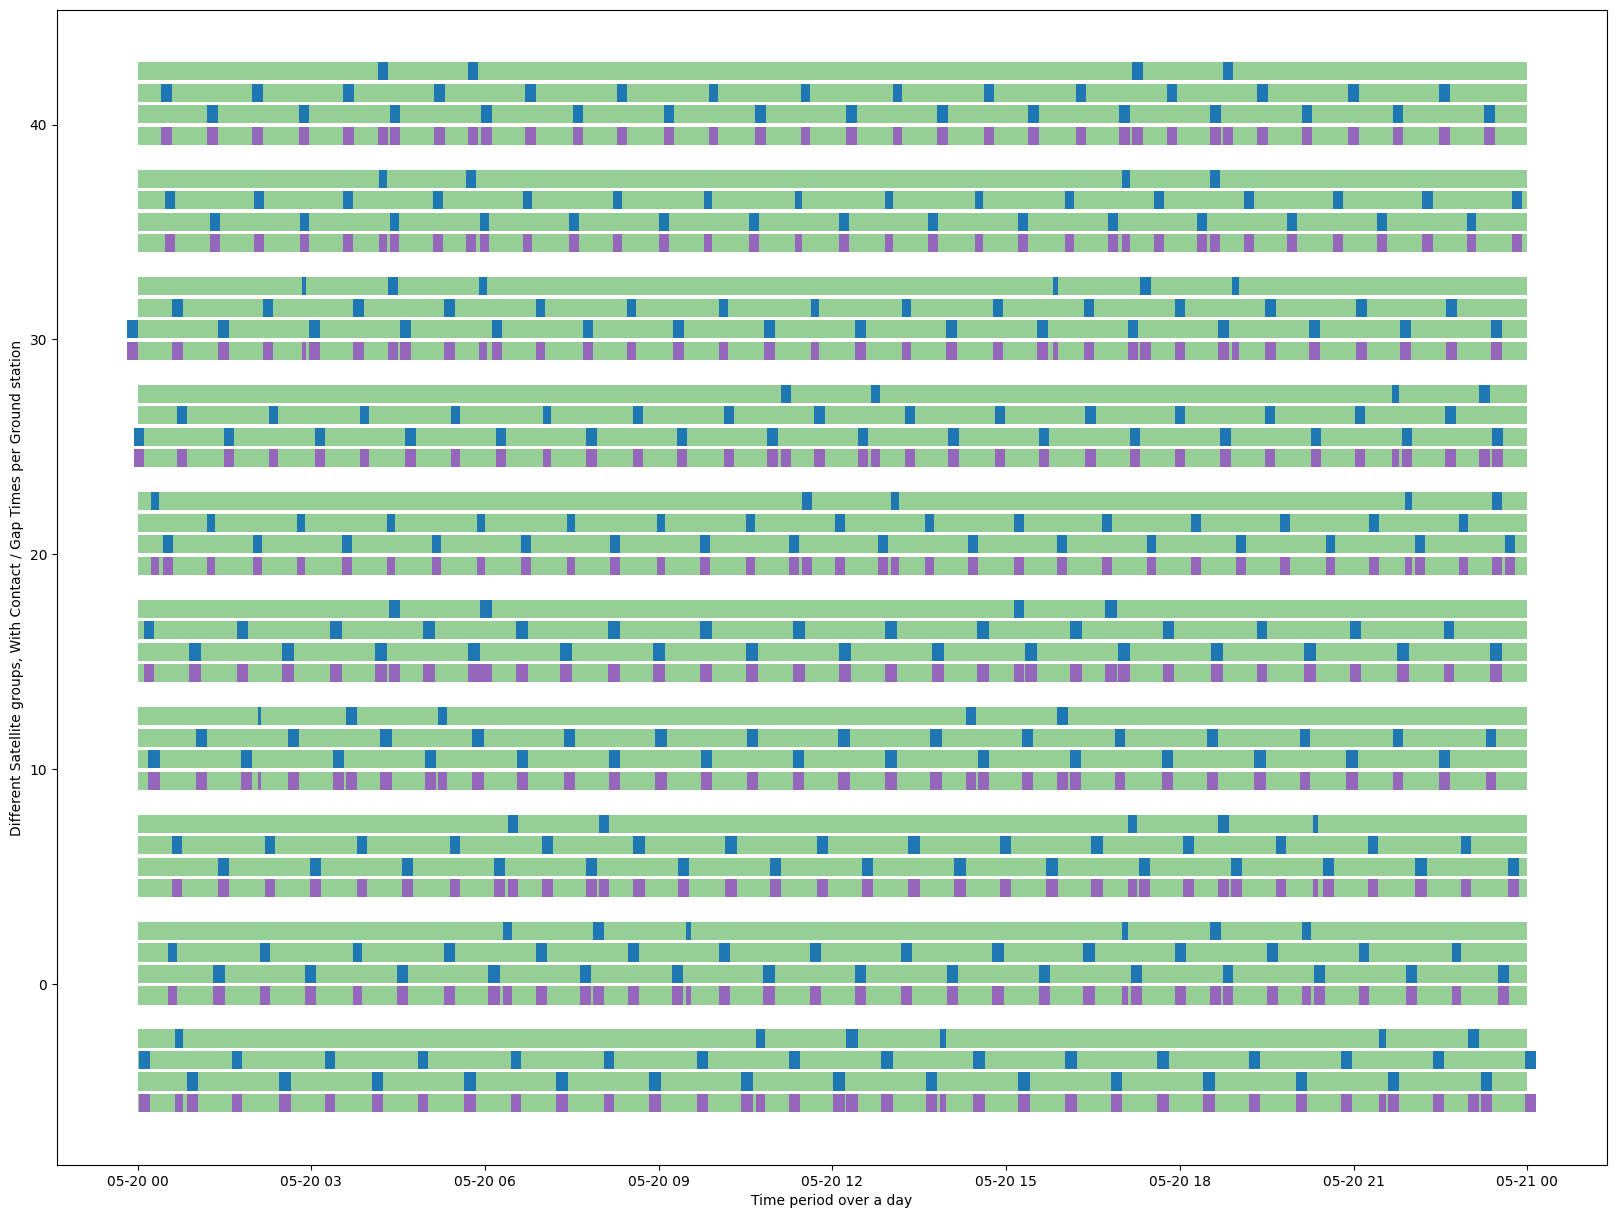

In [11]:
_,_,gap_secs = compute_gaps_per_sat(satellites,ground_stations,epc_start,epc_end, plot,title)

In [12]:
from itertools import chain
import numpy as np
gaps_seconds_flattened = list(chain.from_iterable(gap_secs))

np.mean(gaps_seconds_flattened)


1765.0936346897508